In [65]:
import numpy as np 
import pandas as pd

In [66]:
data=pd.read_csv('Student_Performance.csv')
df=pd.DataFrame(data)

In [67]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [68]:

df.shape

(10000, 6)

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Extracurricular'] = le.fit_transform(df['Extracurricular Activities'])
df.drop('Extracurricular Activities', axis=1, inplace=True)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


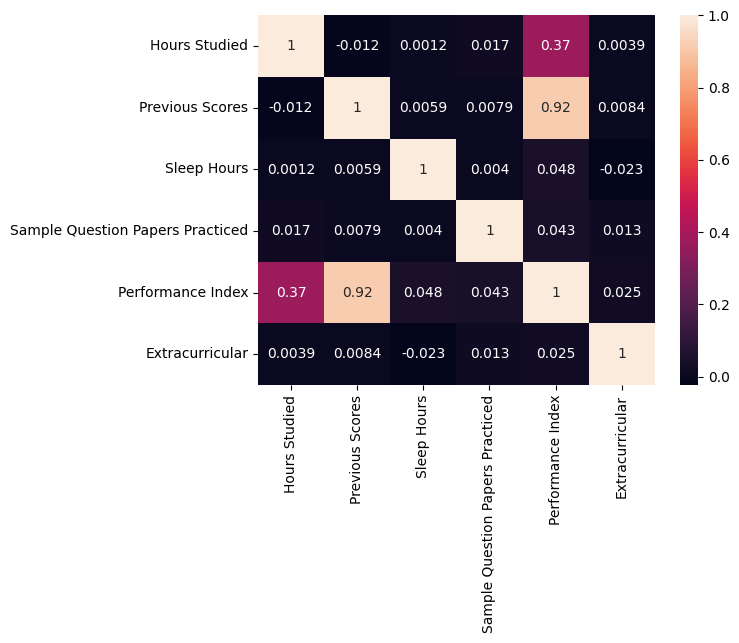

In [70]:
#heatmap to find correlation
import matplotlib.pyplot as plt 
import seaborn as sns   
heatmap=sns.heatmap(df.corr(), annot = True)
plt.show()   

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular                   10000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [72]:
df.duplicated().sum()

np.int64(127)

In [73]:
df.drop_duplicates(inplace=True)
df.shape


(9873, 6)

In [79]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


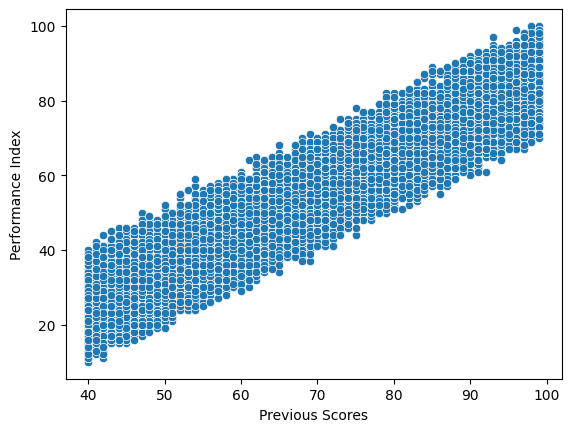

In [82]:
scatter_plot=sns.scatterplot(x='Previous Scores', y='Performance Index', data=df)


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
train=df.drop('Performance Index',axis=1)
target=df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)  
model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)

Predicted values: [46.48001281 80.2853795  61.06518835 ... 77.08443628 86.24676576
 35.8793377 ]
